In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris,make_blobs

from sklearn.decomposition import PCA,KernelPCA

## Dimensionality reduction

In [30]:
iris_data,iris_labels = load_iris()["data"], load_iris()["target"]

In [31]:
iris_pca = PCA()

In [32]:
iris_data_transformed = iris_pca.fit_transform(iris_data)

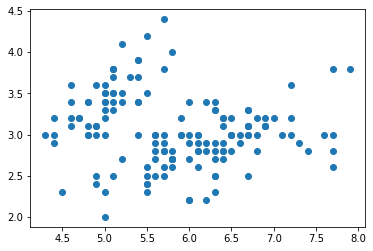

In [33]:
plt.scatter(iris_data[:,0], iris_data[:,1])

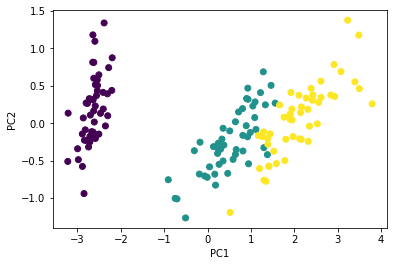

In [34]:
plt.scatter(iris_data_transformed[:,0], iris_data_transformed[:,1],c = iris_labels)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [35]:
iris_pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [36]:
iris_pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

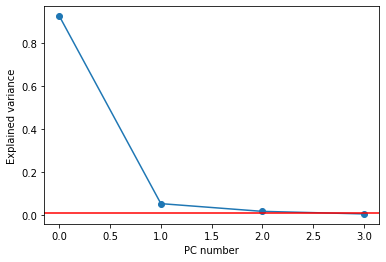

In [37]:
plt.plot(iris_pca.explained_variance_ratio_)
plt.scatter(range(len(iris_pca.explained_variance_ratio_)),iris_pca.explained_variance_ratio_)
plt.axhline(0.01, c="r")

plt.xlabel("PC number")
plt.ylabel("Explained variance")
plt.show()

In [38]:
total_explained_variance = np.cumsum(iris_pca.explained_variance_ratio_)

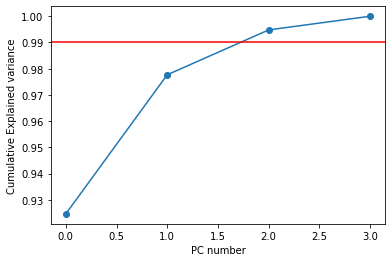

In [39]:
plt.plot(total_explained_variance)
plt.scatter(range(len(total_explained_variance)),total_explained_variance)
plt.axhline(0.99, c="r")
plt.xlabel("PC number")
plt.ylabel("Cumulative Explained variance")
plt.show()

## which components are useful?
in this case I will leave the components until the second one( PC0, PC1, PC2)

In [40]:
blob,_ = make_blobs(centers = [[3,4.5]])

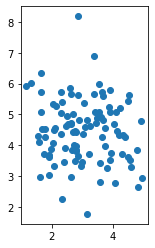

In [41]:
plt.scatter(blob[:,0],blob[:,1])
plt.gca().set_aspect("equal")

In [42]:
# compute eigen values and eigenvectors
np.linalg.eig(np.corrcoef(blob[:,0],blob[:,1]))

(array([1.10457214, 0.89542786]),
 array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]))

In [43]:
blob_pca = PCA()
blob_pcs = blob_pca.fit_transform(blob)

In [44]:
blob_pca.explained_variance_

array([1.10164422, 0.82889247])

In [45]:
blob_pca.get_covariance()

array([[ 0.87305969, -0.10047857],
       [-0.10047857,  1.057477  ]])

In [52]:
iris_kernel_pca = KernelPCA(
    # n_components=5,
    kernel="rbf",
    gamma=0.5
)

In [54]:
iris_kernel_pca.fit_transform(iris_data)

array([[ 8.06112254e-01, -8.52788993e-03, -1.18737536e-01, ...,
        -9.22920460e-05, -7.28441594e-05,  1.28122101e-05],
       [ 7.53590419e-01, -1.21295370e-02, -8.42755705e-02, ...,
         1.69554025e-05, -9.05568952e-06,  1.12935154e-05],
       [ 7.62928489e-01, -4.98405269e-03, -9.95218340e-02, ...,
         1.26330860e-05, -3.12943623e-05, -4.65441976e-06],
       ...,
       [-4.96217010e-01,  4.29936574e-01, -2.29451664e-01, ...,
        -8.05310060e-07,  7.25415208e-07,  3.12313364e-07],
       [-3.73553921e-01,  4.66090038e-01, -8.82043620e-02, ...,
         7.33260705e-08,  9.18499236e-08,  1.04489879e-08],
       [-5.09427113e-01,  8.06174516e-02, -3.28747665e-01, ...,
         3.19949254e-07, -8.28212233e-08,  4.94238833e-08]])

In [55]:
iris_kernel_pca.fit_transform(iris_data).shape

(150, 148)